In [507]:
from datetime import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Parte 1: Extracción de Datos con Expresiones Regulares

Utilizando expresiones regulares, extrae todos los datos anteriores de cada paciente, eligiendo para ello la forma más adecuada de almacenarlos en Python.

In [508]:
reports = []

In [509]:
def extract_name(text):
    expression = re.compile(r"Paciente: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [510]:
def extract_date(text):
    expression = re.compile(r"Fecha: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [511]:
def extract_age(text):
    expression = re.compile(r"Edad: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [512]:
def extract_gender(text):
    expression = re.compile(r"Sexo: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [513]:
def extract_code(text):
    expression = re.compile(r"Código: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [514]:
def extract_symptoms(text):
    expression = re.compile(r"Síntomas: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [515]:
def extract_diagnosis(text):
    expression = re.compile(r"Patología: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [516]:
def extract_severity(text):
    expression = re.compile(r"Gravedad: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [517]:
def extract_treatment(text):
    expression = re.compile(r"Tratamiento: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [518]:
def extract_next_date(text):
    expression = re.compile(r"Próxima Cita: (.*)", re.UNICODE)
    match = re.search(expression, text)
    return match.group(1)

In [519]:
report_files = os.listdir('./medic_report')
for file in report_files:
    file_handler = open('./medic_report' + '/' + file, "r", encoding="utf-8")
    file_content = file_handler.read()

    patient = {}
    patient["name"] = extract_name(file_content)
    patient["date"] = extract_date(file_content)
    patient["age"] = extract_age(file_content)
    patient["gender"] = extract_gender(file_content)
    patient["code"] = extract_code(file_content)
    patient["symptoms"] = extract_symptoms(file_content)
    patient["diagnosis"] = extract_diagnosis(file_content)
    patient["severity"] = extract_severity(file_content)
    patient["treatment"] = extract_treatment(file_content)
    patient["next-date"] = extract_next_date(file_content)

    reports.append(patient)

In [520]:
reports

[{'name': 'María Rodríguez',
  'date': '2023-04-20',
  'age': '35',
  'gender': 'Mujer',
  'code': 'G20230402',
  'symptoms': 'Fiebre, dolor de cabeza',
  'diagnosis': 'Gripe común',
  'severity': 'Leve',
  'treatment': 'Analgésicos y reposo',
  'next-date': '2023-05-05'},
 {'name': 'Andrés Gómez',
  'date': '2024-05-10',
  'age': '60',
  'gender': 'Hombre',
  'code': 'A20240501',
  'symptoms': 'Mareos, dolor de cabeza',
  'diagnosis': 'Hipertensión',
  'severity': 'Moderada',
  'treatment': 'Medicamentos antihipertensivos y cambio en la dieta',
  'next-date': '2024-05-25'},
 {'name': 'Diana Muñoz',
  'date': '2024-06-28',
  'age': '35',
  'gender': 'Mujer',
  'code': 'D20240601',
  'symptoms': 'Picazón en la piel, enrojecimiento',
  'diagnosis': 'Dermatitis alérgica',
  'severity': 'Leve',
  'treatment': 'Crema antiinflamatoria y evitar alérgenos',
  'next-date': '2024-07-13'},
 {'name': 'Alejandro Torres',
  'date': '2024-08-15',
  'age': '42',
  'gender': 'Hombre',
  'code': 'A20240

Parte 2: Análisis de Datos
Responde a las siguientes cuestiones:

1. Enfermedades graves y próximas citas:
Determina cuántos pacientes con una enfermedad grave deberían tener una cita antes de acabar el año 2023.

In [521]:
def is_patient_severe(patient):
    is_severe = patient["severity"] == "Grave"

    try:
        dt = datetime.strptime(patient['next-date'], '%Y-%m-%d')
    except ValueError:
        dt = None

    if dt is not None:
        current_year = dt.year
        return is_severe and str(current_year) > '2023'

    return False

In [522]:
severe_patients = [patient for patient in reports if (is_patient_severe(patient))]
severe_patients

[{'name': 'Raúl Fernández',
  'date': '2024-02-05',
  'age': '48',
  'gender': 'Hombre',
  'code': 'R20240201',
  'symptoms': 'Tos seca, dificultad para respirar',
  'diagnosis': 'Asma',
  'severity': 'Grave',
  'treatment': 'Inhaladores y corticosteroides',
  'next-date': '2024-02-20'}]

In [523]:
print(
    f"There are a total of {len(severe_patients)} severe patients who have a next appointment scheduled date later than 2023.")

There are a total of 1 severe patients who have a next appointment scheduled date later than 2023.


2. Enfermedades y sexo del paciente:
Analiza la relación entre ciertas enfermedades y el sexo del paciente. ¿Se puede identificar algún tipo de patrón reseñable en cuanto a qué sexo parece enfermar más de cierta enfermedad?
Consulta si lo necesitas el anexo 1 que viene al final de este documento dónde se presenta una posible estrategia para contestar a esta pregunta.

In [524]:
diseases = {}

for report in reports:
    if report["diagnosis"] in diseases:
        diseases[report["diagnosis"]][report["gender"]] += 1
    else:
        diseases[report["diagnosis"]] = {"Hombre": 0, "Mujer": 0}
        diseases[report["diagnosis"]][report["gender"]] += 1

In [525]:
diseases

{'Gripe común': {'Hombre': 0, 'Mujer': 3},
 'Hipertensión': {'Hombre': 1, 'Mujer': 0},
 'Dermatitis alérgica': {'Hombre': 0, 'Mujer': 1},
 'Artritis': {'Hombre': 1, 'Mujer': 0},
 'Arritmia cardíaca': {'Hombre': 0, 'Mujer': 1},
 'Alergia estacional': {'Hombre': 1, 'Mujer': 0},
 'Gastroenteritis': {'Hombre': 0, 'Mujer': 2},
 'Amigdalitis': {'Hombre': 1, 'Mujer': 1},
 'Resfriado común': {'Hombre': 3, 'Mujer': 2},
 'Infarto agudo de miocardio': {'Hombre': 1, 'Mujer': 0},
 'Migraña': {'Hombre': 0, 'Mujer': 1},
 'COVID-19': {'Hombre': 1, 'Mujer': 0},
 'Asma': {'Hombre': 1, 'Mujer': 0}}

In [526]:
df = pd.DataFrame.from_dict(diseases, orient='index')
df

,Hombre,Mujer
Gripe común,0,3
Hipertensión,1,0
Dermatitis alérgica,0,1
Artritis,1,0
Arritmia cardíaca,0,1
Alergia estacional,1,0
Gastroenteritis,0,2
Amigdalitis,1,1
Resfriado común,3,2
Infarto agudo de miocardio,1,0


C:\Users\jsanchez\AppData\Local\Temp\ipykernel_20124\2797828993.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation='vertical')


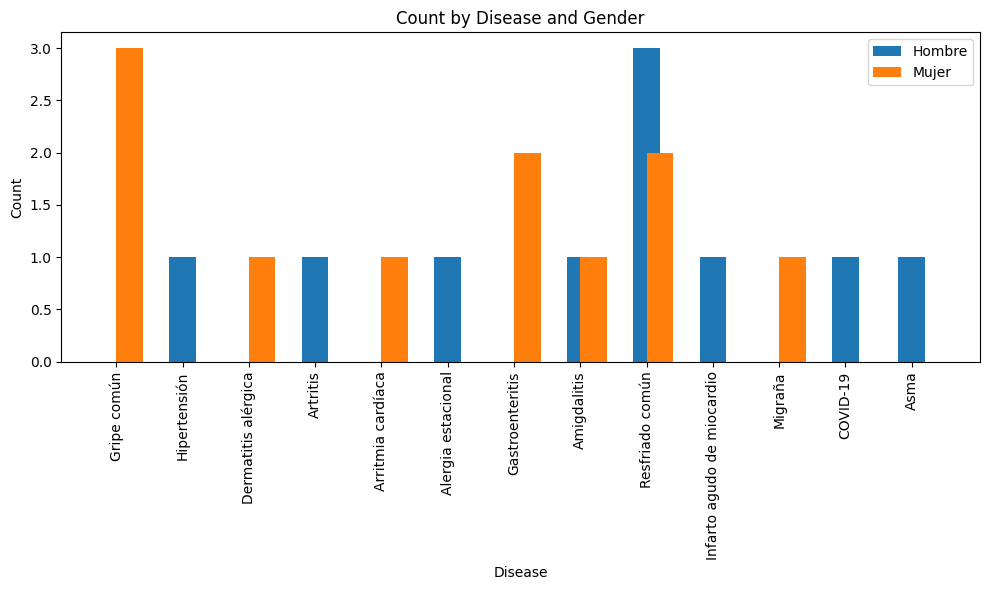

In [527]:
fig, ax = plt.subplots(figsize=(10, 6))

# create bar chart with 'Men' data
bar1 = ax.bar(df.index, df['Hombre'], width=0.4, label='Hombre')

# create bar chart with 'Women' data. Offset the position by width of 'Men' bars.
bar2 = ax.bar(df.index, df['Mujer'], width=0.4, label='Mujer', align='edge')

ax.set_xlabel('Disease')
ax.set_ylabel('Count')
ax.set_title('Count by Disease and Gender')
ax.set_xticklabels(df.index, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()

3. Correlación entre edad y gravedad de las enfermedades:
Investiga si existe alguna correlación entre la edad de los pacientes y la gravedad de sus enfermedades. ¿Hay una tendencia que sugiera que los pacientes más jóvenes tienden a tener enfermedades menos graves en comparación con los pacientes mayores?
Consulta si lo necesitas el anexo 2 que viene al final de este documento dónde se explica qué es la correlación en estadística y cómo calcularla en Python.

In [528]:
def normalize_severity(severity):
    if severity == "Leve":
        return 1
    if severity == "Moderada":
        return 2
    if severity == "Grave":
        return 3

In [529]:
import numpy as np

# Datos de ejemplo
ages = [int(report["age"]) for report in reports]
severities = [report["severity"] for report in reports]
severities = [normalize_severity(severity) for severity in severities]
severities

[100,
 200,
 100,
 200,
 200,
 100,
 200,
 100,
 200,
 300,
 200,
 200,
 200,
 100,
 100,
 200,
 100,
 200,
 200,
 300,
 100]

In [530]:
# Calcula el coeficiente de correlación
correlation_matrix = np.corrcoef(ages, severities)
correlation_coefficient = correlation_matrix[0, 1]
print(f"Coeficiente de correlación: {correlation_coefficient}")

Coeficiente de correlación: 0.6921212210171104
